In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm

from collections import Counter
from matplotlib import pyplot as plt

sns.set_theme(style='darkgrid')
# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', 20)
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

# Исследование набора данных для обучения

## Загружаем исходный набор данных train

In [2]:
train_original = pd.read_csv('train.csv', index_col=False)
train_original

,TENURE,CITY,is_churn,BILLS_NUM,INV_MON_1,INV_MON_2,INV_MON_3,INV_MON_4,INV_MON_5,INV_MON_6,N_LATE_FEES,N_NON_SETTLED,AVG_BILL,MIN_BILL,MAX_BILL,MAX2MIN_BILL,PAY_NUM,AVG_PAY,MAX_PAY,MIN_PAY,PAY_MON_1,PAY_MON_2,PAY_MON_3,PAY_MON_4,PAY_MON_5,PAY_MON_6,MAX2MIN_PAY,ADJ_NUM,AVG_ADJ,ADJ_MON_1,ADJ_MON_2,ADJ_MON_3,ADJ_MON_4,ADJ_MON_5,ADJ_MON_6,MIN_ADJ,MAX_ADJ,MAXMINDIFF_ADJ,DSON_NUM_BUNDLE,DSON_MON_1_BUNDLE,DSON_MON_2_BUNDLE,DSON_MON_3_BUNDLE,DSON_MON_4_BUNDLE,DSON_MON_5_BUNDLE,DSON_MON_6_BUNDLE,DSON_NUM_PROMO,DSON_MON_1_PROMO,DSON_MON_2_PROMO,DSON_MON_3_PROMO,DSON_MON_4_PROMO,DSON_MON_5_PROMO,DSON_MON_6_PROMO,DSOF_NUM_BUNDLE,DSOF_MON_1_BUNDLE,DSOF_MON_2_BUNDLE,DSOF_MON_3_BUNDLE,DSOF_MON_4_BUNDLE,DSOF_MON_5_BUNDLE,DSOF_MON_6_BUNDLE,DSOF_NUM_PROMO,DSOF_MON_1_PROMO,DSOF_MON_2_PROMO,DSOF_MON_3_PROMO,DSOF_MON_4_PROMO,DSOF_MON_5_PROMO,DSOF_MON_6_PROMO,INTERACTS_NUM,TFT,SUPPORT,SOCIAL_MEDIA,OUTBOUND_CALL,MANAGE_ACCT,INQUIRY,INBOUND_CALL,ESCALATION,EMAIL,CALL_BACK,CTI,PLAY_TV,PLAY_PHONE,PLAY_INET,SINGLE_PLAY,DOUBLE_PLAY,TRIPLE_PLAY,UNKNOWN_PLAY,INV_MON_A,INV_MON_B,PAY_MON_A,PAY_MON_B,ADJ_MON_A,ADJ_MON_B,DSON_MONPROMO_A,DSON_MONPROMO_B,DSOF_MONPROMO_A,DSOF_MONPROMO_B,DSON_MONBUNDLE_A,DSON_MONBUNDLE_B,DSOF_MONBUNDLE_A,DSOF_MONBUNDLE_B,ITR_CAT_119,ITR_CAT_120,ITR_CAT_114,ITR_CAT_9,ITR_CAT_123,ITR_CAT_128,ITR_CAT_102,ITR_CAT_104,ITR_CAT_115,ITR_CAT_8,ITR_CAT_122,ITR_CAT_0,ITR_CAT_22,ITR_CAT_133,ITR_CAT_124,ITR_CAT_135,ITR_CAT_56,ITR_CAT_113,ITR_CAT_126,ITR_CAT_116,ITR_CAT_84,ITR_CAT_51,ITR_CAT_117,ITR_CAT_105,ITR_CAT_81,ITR_CAT_54,ITR_CAT_101,ITR_CAT_134,ITR_CAT_71,ITR_CAT_62,ITR_CAT_78,ITR_CAT_138,ITR_CAT_17,ITR_CAT_41,ITR_CAT_69,ADJ_TYP_BALANCE_TRANSFER,ADJ_TYP_CREDIT_UNRETURNED_EQUI,ADJ_TYP_TELEVISION_PRODUCT,ADJ_TYP_OTHERS,ADJ_TYP_COLLECTION_CHARGES,ADJ_TYP_GOODWILL_CREDIT,ADJ_TYP_EQUIPMENT,ADJ_TYP_INTERNET_USAGE,ADJ_TYP_INSTALLATION_FEES,ADJ_TYP_PHONE_PRODUCT,ADJ_TYP_TELEPHONY_USAGE,ADJ_TYP_EARLY_TERMINATION_FEES,ADJ_TYP_VIDEO_ON_DEMAND,ADJ_TYP_OTHER_PAYMENTS,ADJ_TYP_RECOVERY_OF_CREDIT_WRI,ADJ_TYP_LATE_FEES,ADJ_TYP_ADMIN_FEES,ADJ_TYP_OTHER_FEES,ADJ_TYP_INTERNET_PRODUCT,ADJ_TYP_ACTIVATION_FEES,ADJ_TYP_REFUSED_BY_PAYOR_OTHER,ADJ_TYP_RATE_CHANGE,ADJ_TYP_CREDIT_BALANCE,ADJ_TYP_PAYMENT_DEBIT_AUTHORIZ,ADJ_TYP_PAY_PER_VIEW,ADJ_TYP_RECONNECT_FEES,CUSTOMER_ID,PAYMENT_METHOD,AGE,LANGUAGE,GENDER,REGION
0,31,0,0,6,103870,150900,150900,150900,150900,148360,0,0,142638.333333,103870.0,150900.0,1.452778,6,161185.000000,170520,117380,117380,170520,170520,170520,170520,167650,1.452718,0,0.000000,0,0,0,0,0,0,0.0,0.0,0.0,1,0,1,0,0,0,0,2,0,2,0,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4,0,0,0,0,0,0,3,0,0,0,1,30,0,5,0,1,0,0,-6355.714286,158527.619048,-7181.428571,179138.571429,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,385655,Other,27.0,first_language,UNKNOWN,0
1,429,362,0,6,123090,152930,152930,152930,152930,152930,0,0,147956.666667,123090.0,152930.0,1.242424,6,172810.000000,172810,172810,172810,172810,172810,172810,345620,0,1.000000,0,0.000000,0,0,0,0,0,0,0.0,0.0,0.0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,2,0,0,0,0,0,0,0,0,0,0,2,8,10,3,0,0,1,0,-4262.857143,158613.809524,-34562.000000,276496.000000,0.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,446885,Other,65.0,first_language,UNKNOWN,0
2,97,102,0,6,121680,116130,116280,115980,120330,120180,0,0,118430.000000,115980.0,121680.0,1.049146,6,133831.666667,137500,131060,137500,131230,131400,131060,135980,135820,1.049138,3,950.000000,2850,0,0,0,0,0,2850.0,2850.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0,0,0,0,0,1,0,0,0,1,13,5,0,0,1,0,0,

## Смотрим информацию об этом наборе

In [3]:
print('Информация о DataFrame:')
train_original.info()

Информация о DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589878 entries, 0 to 589877
Columns: 166 entries, TENURE to REGION
dtypes: float64(74), int64(89), object(3)
memory usage: 747.1+ MB


In [4]:
num_row, num_col = train_original.shape
print(f'Количество строк: {num_row}\nКоличество столбцов: {num_col}')

Количество строк: 589878
Количество столбцов: 166


## Исследуем столбцы (признаки)

In [5]:
all_columns = train_original.columns.tolist()
print(f'Список всех признаков:\n{all_columns}')

Список всех признаков:
['TENURE', 'CITY', 'is_churn', 'BILLS_NUM', 'INV_MON_1', 'INV_MON_2', 'INV_MON_3', 'INV_MON_4', 'INV_MON_5', 'INV_MON_6', 'N_LATE_FEES', 'N_NON_SETTLED', 'AVG_BILL', 'MIN_BILL', 'MAX_BILL', 'MAX2MIN_BILL', 'PAY_NUM', 'AVG_PAY', 'MAX_PAY', 'MIN_PAY', 'PAY_MON_1', 'PAY_MON_2', 'PAY_MON_3', 'PAY_MON_4', 'PAY_MON_5', 'PAY_MON_6', 'MAX2MIN_PAY', 'ADJ_NUM', 'AVG_ADJ', 'ADJ_MON_1', 'ADJ_MON_2', 'ADJ_MON_3', 'ADJ_MON_4', 'ADJ_MON_5', 'ADJ_MON_6', 'MIN_ADJ', 'MAX_ADJ', 'MAXMINDIFF_ADJ', 'DSON_NUM_BUNDLE', 'DSON_MON_1_BUNDLE', 'DSON_MON_2_BUNDLE', 'DSON_MON_3_BUNDLE', 'DSON_MON_4_BUNDLE', 'DSON_MON_5_BUNDLE', 'DSON_MON_6_BUNDLE', 'DSON_NUM_PROMO', 'DSON_MON_1_PROMO', 'DSON_MON_2_PROMO', 'DSON_MON_3_PROMO', 'DSON_MON_4_PROMO', 'DSON_MON_5_PROMO', 'DSON_MON_6_PROMO', 'DSOF_NUM_BUNDLE', 'DSOF_MON_1_BUNDLE', 'DSOF_MON_2_BUNDLE', 'DSOF_MON_3_BUNDLE', 'DSOF_MON_4_BUNDLE', 'DSOF_MON_5_BUNDLE', 'DSOF_MON_6_BUNDLE', 'DSOF_NUM_PROMO', 'DSOF_MON_1_PROMO', 'DSOF_MON_2_PROMO', 'DSOF_MO

In [6]:
categorical_features = ['CITY', 'TFT', 'SUPPORT', 'SOCIAL_MEDIA', 'OUTBOUND_CALL', 'MANAGE_ACCT', 'INQUIRY', 'INBOUND_CALL', 'ESCALATION', 'EMAIL', 'CALL_BACK', 'CTI', 'PLAY_TV', 'PLAY_PHONE', 'PLAY_INET', 'SINGLE_PLAY', 'DOUBLE_PLAY', 'TRIPLE_PLAY', 'UNKNOWN_PLAY', 'ITR_CAT_119', 'ITR_CAT_120', 'ITR_CAT_114', 'ITR_CAT_9', 'ITR_CAT_123', 'ITR_CAT_128', 'ITR_CAT_102', 'ITR_CAT_104', 'ITR_CAT_115', 'ITR_CAT_8', 'ITR_CAT_122', 'ITR_CAT_0', 'ITR_CAT_22', 'ITR_CAT_133', 'ITR_CAT_124', 'ITR_CAT_135', 'ITR_CAT_56', 'ITR_CAT_113', 'ITR_CAT_126', 'ITR_CAT_116', 'ITR_CAT_84', 'ITR_CAT_51', 'ITR_CAT_117', 'ITR_CAT_105', 'ITR_CAT_81', 'ITR_CAT_54', 'ITR_CAT_101', 'ITR_CAT_134', 'ITR_CAT_71', 'ITR_CAT_62', 'ITR_CAT_78', 'ITR_CAT_138', 'ITR_CAT_17', 'ITR_CAT_41', 'ITR_CAT_69', 'ADJ_TYP_BALANCE_TRANSFER', 'ADJ_TYP_CREDIT_UNRETURNED_EQUI', 'ADJ_TYP_TELEVISION_PRODUCT', 'ADJ_TYP_OTHERS', 'ADJ_TYP_COLLECTION_CHARGES', 'ADJ_TYP_GOODWILL_CREDIT', 'ADJ_TYP_EQUIPMENT', 'ADJ_TYP_INTERNET_USAGE', 'ADJ_TYP_INSTALLATION_FEES', 'ADJ_TYP_PHONE_PRODUCT', 'ADJ_TYP_TELEPHONY_USAGE', 'ADJ_TYP_EARLY_TERMINATION_FEES', 'ADJ_TYP_VIDEO_ON_DEMAND', 'ADJ_TYP_OTHER_PAYMENTS', 'ADJ_TYP_RECOVERY_OF_CREDIT_WRI', 'ADJ_TYP_LATE_FEES', 'ADJ_TYP_ADMIN_FEES', 'ADJ_TYP_OTHER_FEES', 'ADJ_TYP_INTERNET_PRODUCT', 'ADJ_TYP_ACTIVATION_FEES', 'ADJ_TYP_REFUSED_BY_PAYOR_OTHER', 'ADJ_TYP_RATE_CHANGE', 'ADJ_TYP_CREDIT_BALANCE', 'ADJ_TYP_PAYMENT_DEBIT_AUTHORIZ', 'ADJ_TYP_PAY_PER_VIEW', 'ADJ_TYP_RECONNECT_FEES', 'PAYMENT_METHOD', 'LANGUAGE', 'GENDER', 'CUSTOMER_ID', 'REGION', 'is_churn']
numerical_features = ['TENURE', 'BILLS_NUM', 'INV_MON_1', 'INV_MON_2', 'INV_MON_3', 'INV_MON_4', 'INV_MON_5', 'INV_MON_6', 'N_LATE_FEES', 'N_NON_SETTLED', 'AVG_BILL', 'MIN_BILL', 'MAX_BILL', 'MAX2MIN_BILL', 'PAY_NUM', 'AVG_PAY', 'MAX_PAY', 'MIN_PAY', 'PAY_MON_1', 'PAY_MON_2', 'PAY_MON_3', 'PAY_MON_4', 'PAY_MON_5', 'PAY_MON_6', 'MAX2MIN_PAY', 'ADJ_NUM', 'AVG_ADJ', 'ADJ_MON_1', 'ADJ_MON_2', 'ADJ_MON_3', 'ADJ_MON_4', 'ADJ_MON_5', 'ADJ_MON_6', 'MIN_ADJ', 'MAX_ADJ', 'MAXMINDIFF_ADJ', 'DSON_NUM_BUNDLE', 'DSON_MON_1_BUNDLE', 'DSON_MON_2_BUNDLE', 'DSON_MON_3_BUNDLE', 'DSON_MON_4_BUNDLE', 'DSON_MON_5_BUNDLE', 'DSON_MON_6_BUNDLE', 'DSON_NUM_PROMO', 'DSON_MON_1_PROMO', 'DSON_MON_2_PROMO', 'DSON_MON_3_PROMO', 'DSON_MON_4_PROMO', 'DSON_MON_5_PROMO', 'DSON_MON_6_PROMO', 'DSOF_NUM_BUNDLE', 'DSOF_MON_1_BUNDLE', 'DSOF_MON_2_BUNDLE', 'DSOF_MON_3_BUNDLE', 'DSOF_MON_4_BUNDLE', 'DSOF_MON_5_BUNDLE', 'DSOF_MON_6_BUNDLE', 'DSOF_NUM_PROMO', 'DSOF_MON_1_PROMO', 'DSOF_MON_2_PROMO', 'DSOF_MON_3_PROMO', 'DSOF_MON_4_PROMO', 'DSOF_MON_5_PROMO', 'DSOF_MON_6_PROMO', 'INTERACTS_NUM', 'INV_MON_A', 'INV_MON_B', 'PAY_MON_A', 'PAY_MON_B', 'ADJ_MON_A', 'ADJ_MON_B', 'DSON_MONPROMO_A', 'DSON_MONPROMO_B', 'DSOF_MONPROMO_A', 'DSOF_MONPROMO_B', 'DSON_MONBUNDLE_A', 'DSON_MONBUNDLE_B', 'DSOF_MONBUNDLE_A', 'DSOF_MONBUNDLE_B', 'AGE']
cat_f_num, num_f_num = len(categorical_features), len(numerical_features)
print(f'Количество категориальных признаков: {cat_f_num}\nКоличество числовых признаков: {num_f_num}')
train_original.describe()

Количество категориальных признаков: 86
Количество числовых признаков: 80


,TENURE,CITY,is_churn,BILLS_NUM,INV_MON_1,INV_MON_2,INV_MON_3,INV_MON_4,INV_MON_5,INV_MON_6,N_LATE_FEES,N_NON_SETTLED,AVG_BILL,MIN_BILL,MAX_BILL,MAX2MIN_BILL,PAY_NUM,AVG_PAY,MAX_PAY,MIN_PAY,PAY_MON_1,PAY_MON_2,PAY_MON_3,PAY_MON_4,PAY_MON_5,PAY_MON_6,MAX2MIN_PAY,ADJ_NUM,AVG_ADJ,ADJ_MON_1,ADJ_MON_2,ADJ_MON_3,ADJ_MON_4,ADJ_MON_5,ADJ_MON_6,MIN_ADJ,MAX_ADJ,MAXMINDIFF_ADJ,DSON_NUM_BUNDLE,DSON_MON_1_BUNDLE,DSON_MON_2_BUNDLE,DSON_MON_3_BUNDLE,DSON_MON_4_BUNDLE,DSON_MON_5_BUNDLE,DSON_MON_6_BUNDLE,DSON_NUM_PROMO,DSON_MON_1_PROMO,DSON_MON_2_PROMO,DSON_MON_3_PROMO,DSON_MON_4_PROMO,DSON_MON_5_PROMO,DSON_MON_6_PROMO,DSOF_NUM_BUNDLE,DSOF_MON_1_BUNDLE,DSOF_MON_2_BUNDLE,DSOF_MON_3_BUNDLE,DSOF_MON_4_BUNDLE,DSOF_MON_5_BUNDLE,DSOF_MON_6_BUNDLE,DSOF_NUM_PROMO,DSOF_MON_1_PROMO,DSOF_MON_2_PROMO,DSOF_MON_3_PROMO,DSOF_MON_4_PROMO,DSOF_MON_5_PROMO,DSOF_MON_6_PROMO,INTERACTS_NUM,TFT,SUPPORT,SOCIAL_MEDIA,OUTBOUND_CALL,MANAGE_ACCT,INQUIRY,INBOUND_CALL,ESCALATION,EMAIL,CALL_BACK,CTI,PLAY_TV,PLAY_PHONE,PLAY_INET,SINGLE_PLAY,DOUBLE_PLAY,TRIPLE_PLAY,UNKNOWN_PLAY,INV_MON_A,INV_MON_B,PAY_MON_A,PAY_MON_B,ADJ_MON_A,ADJ_MON_B,DSON_MONPROMO_A,DSON_MONPROMO_B,DSOF_MONPROMO_A,DSOF_MONPROMO_B,DSON_MONBUNDLE_A,DSON_MONBUNDLE_B,DSOF_MONBUNDLE_A,DSOF_MONBUNDLE_B,ITR_CAT_119,ITR_CAT_120,ITR_CAT_114,ITR_CAT_9,ITR_CAT_123,ITR_CAT_128,ITR_CAT_102,ITR_CAT_104,ITR_CAT_115,ITR_CAT_8,ITR_CAT_122,ITR_CAT_0,ITR_CAT_22,ITR_CAT_133,ITR_CAT_124,ITR_CAT_135,ITR_CAT_56,ITR_CAT_113,ITR_CAT_126,ITR_CAT_116,ITR_CAT_84,ITR_CAT_51,ITR_CAT_117,ITR_CAT_105,ITR_CAT_81,ITR_CAT_54,ITR_CAT_101,ITR_CAT_134,ITR_CAT_71,ITR_CAT_62,ITR_CAT_78,ITR_CAT_138,ITR_CAT_17,ITR_CAT_41,ITR_CAT_69,ADJ_TYP_BALANCE_TRANSFER,ADJ_TYP_CREDIT_UNRETURNED_EQUI,ADJ_TYP_TELEVISION_PRODUCT,ADJ_TYP_OTHERS,ADJ_TYP_COLLECTION_CHARGES,ADJ_TYP_GOODWILL_CREDIT,ADJ_TYP_EQUIPMENT,ADJ_TYP_INTERNET_USAGE,ADJ_TYP_INSTALLATION_FEES,ADJ_TYP_PHONE_PRODUCT,ADJ_TYP_TELEPHONY_USAGE,ADJ_TYP_EARLY_TERMINATION_FEES,ADJ_TYP_VIDEO_ON_DEMAND,ADJ_TYP_OTHER_PAYMENTS,ADJ_TYP_RECOVERY_OF_CREDIT_WRI,ADJ_TYP_LATE_FEES,ADJ_TYP_ADMIN_FEES,ADJ_TYP_OTHER_FEES,ADJ_TYP_INTERNET_PRODUCT,ADJ_TYP_ACTIVATION_FEES,ADJ_TYP_REFUSED_BY_PAYOR_OTHER,ADJ_TYP_RATE_CHANGE,ADJ_TYP_CREDIT_BALANCE,ADJ_TYP_PAYMENT_DEBIT_AUTHORIZ,ADJ_TYP_PAY_PER_VIEW,ADJ_TYP_RECONNECT_FEES,CUSTOMER_ID,AGE,REGION
count,589878.000000,589878.000000,589878.000000,589878.000000,5.898780e+05,5.898780e+05,5.898780e+05,5.898780e+05,5.898780e+05,5.898780e+05,589878.000000,589878.000000,5.898780e+05,5.898780e+05,5.898780e+05,589878.000000,589878.000000,5.898780e+05,5.898780e+05,5.898780e+05,5.898780e+05,5.898780e+05,5.898780e+05,5.898780e+05,5.898780e+05,5.898780e+05,589878.000000,589878.000000,5.898780e+05,5.898780e+05,5.898780e+05,5.898780e+05,5.898780e+05,5.898780e+05,5.898780e+05,5.898780e+05,5.898780e+05,5.898780e+05,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,5.898780e+05,5.898780e+05,5.898780e+05,5.898780e+05,5.898780e+05,5.898780e+05,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,589878.000000,5898

In [14]:
pd.DataFrame(train_original.isnull().sum()).T

,TENURE,CITY,is_churn,BILLS_NUM,INV_MON_1,INV_MON_2,INV_MON_3,INV_MON_4,INV_MON_5,INV_MON_6,N_LATE_FEES,N_NON_SETTLED,AVG_BILL,MIN_BILL,MAX_BILL,MAX2MIN_BILL,PAY_NUM,AVG_PAY,MAX_PAY,MIN_PAY,PAY_MON_1,PAY_MON_2,PAY_MON_3,PAY_MON_4,PAY_MON_5,PAY_MON_6,MAX2MIN_PAY,ADJ_NUM,AVG_ADJ,ADJ_MON_1,ADJ_MON_2,ADJ_MON_3,ADJ_MON_4,ADJ_MON_5,ADJ_MON_6,MIN_ADJ,MAX_ADJ,MAXMINDIFF_ADJ,DSON_NUM_BUNDLE,DSON_MON_1_BUNDLE,DSON_MON_2_BUNDLE,DSON_MON_3_BUNDLE,DSON_MON_4_BUNDLE,DSON_MON_5_BUNDLE,DSON_MON_6_BUNDLE,DSON_NUM_PROMO,DSON_MON_1_PROMO,DSON_MON_2_PROMO,DSON_MON_3_PROMO,DSON_MON_4_PROMO,DSON_MON_5_PROMO,DSON_MON_6_PROMO,DSOF_NUM_BUNDLE,DSOF_MON_1_BUNDLE,DSOF_MON_2_BUNDLE,DSOF_MON_3_BUNDLE,DSOF_MON_4_BUNDLE,DSOF_MON_5_BUNDLE,DSOF_MON_6_BUNDLE,DSOF_NUM_PROMO,DSOF_MON_1_PROMO,DSOF_MON_2_PROMO,DSOF_MON_3_PROMO,DSOF_MON_4_PROMO,DSOF_MON_5_PROMO,DSOF_MON_6_PROMO,INTERACTS_NUM,TFT,SUPPORT,SOCIAL_MEDIA,OUTBOUND_CALL,MANAGE_ACCT,INQUIRY,INBOUND_CALL,ESCALATION,EMAIL,CALL_BACK,CTI,PLAY_TV,PLAY_PHONE,PLAY_INET,SINGLE_PLAY,DOUBLE_PLAY,TRIPLE_PLAY,UNKNOWN_PLAY,INV_MON_A,INV_MON_B,PAY_MON_A,PAY_MON_B,ADJ_MON_A,ADJ_MON_B,DSON_MONPROMO_A,DSON_MONPROMO_B,DSOF_MONPROMO_A,DSOF_MONPROMO_B,DSON_MONBUNDLE_A,DSON_MONBUNDLE_B,DSOF_MONBUNDLE_A,DSOF_MONBUNDLE_B,ITR_CAT_119,ITR_CAT_120,ITR_CAT_114,ITR_CAT_9,ITR_CAT_123,ITR_CAT_128,ITR_CAT_102,ITR_CAT_104,ITR_CAT_115,ITR_CAT_8,ITR_CAT_122,ITR_CAT_0,ITR_CAT_22,ITR_CAT_133,ITR_CAT_124,ITR_CAT_135,ITR_CAT_56,ITR_CAT_113,ITR_CAT_126,ITR_CAT_116,ITR_CAT_84,ITR_CAT_51,ITR_CAT_117,ITR_CAT_105,ITR_CAT_81,ITR_CAT_54,ITR_CAT_101,ITR_CAT_134,ITR_CAT_71,ITR_CAT_62,ITR_CAT_78,ITR_CAT_138,ITR_CAT_17,ITR_CAT_41,ITR_CAT_69,ADJ_TYP_BALANCE_TRANSFER,ADJ_TYP_CREDIT_UNRETURNED_EQUI,ADJ_TYP_TELEVISION_PRODUCT,ADJ_TYP_OTHERS,ADJ_TYP_COLLECTION_CHARGES,ADJ_TYP_GOODWILL_CREDIT,ADJ_TYP_EQUIPMENT,ADJ_TYP_INTERNET_USAGE,ADJ_TYP_INSTALLATION_FEES,ADJ_TYP_PHONE_PRODUCT,ADJ_TYP_TELEPHONY_USAGE,ADJ_TYP_EARLY_TERMINATION_FEES,ADJ_TYP_VIDEO_ON_DEMAND,ADJ_TYP_OTHER_PAYMENTS,ADJ_TYP_RECOVERY_OF_CREDIT_WRI,ADJ_TYP_LATE_FEES,ADJ_TYP_ADMIN_FEES,ADJ_TYP_OTHER_FEES,ADJ_TYP_INTERNET_PRODUCT,ADJ_TYP_ACTIVATION_FEES,ADJ_TYP_REFUSED_BY_PAYOR_OTHER,ADJ_TYP_RATE_CHANGE,ADJ_TYP_CREDIT_BALANCE,ADJ_TYP_PAYMENT_DEBIT_AUTHORIZ,ADJ_TYP_PAY_PER_VIEW,ADJ_TYP_RECONNECT_FEES,CUSTOMER_ID,PAYMENT_METHOD,AGE,LANGUAGE,GENDER,REGION
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45198,0,0,0


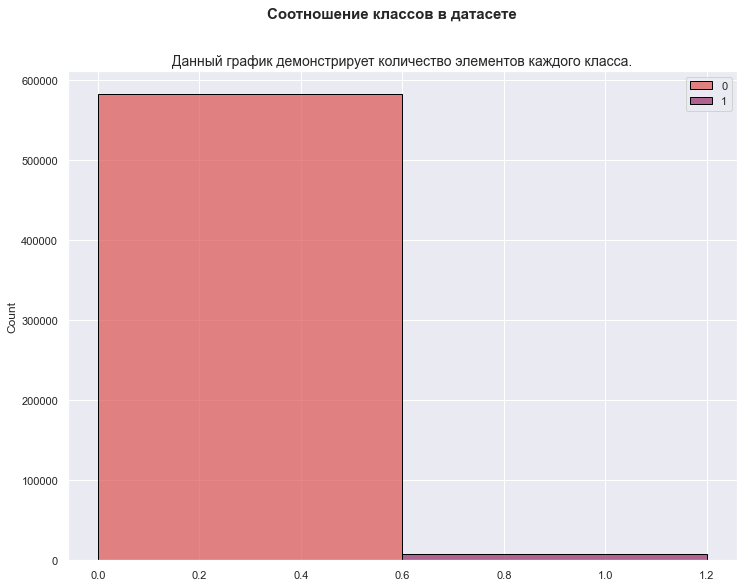

In [18]:
fig = plt.figure(figsize=(12, 9))
sas = sns.histplot(x=train_original.is_churn.values, hue=train_original.is_churn.values, multiple="dodge", binwidth=1.2, edgecolor='black', palette='flare')
fig.suptitle("Соотношение классов в датасете", size = 15, fontweight = 'bold')
plt.title('Данный график демонстрирует количество элементов каждого класса.', fontsize=14)
plt.show()

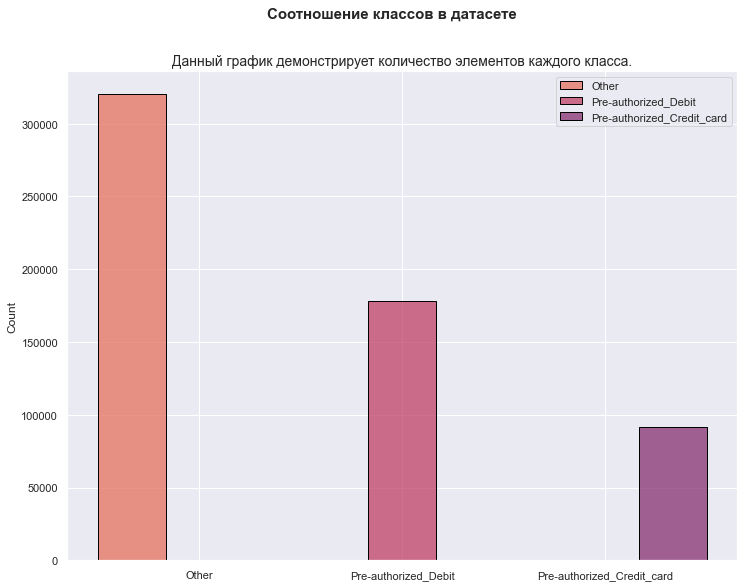

In [20]:
fig = plt.figure(figsize=(12, 9))
sas = sns.histplot(x=train_original.PAYMENT_METHOD.values, hue=train_original.PAYMENT_METHOD.values, multiple="dodge", binwidth=1.2, edgecolor='black', palette='flare')
fig.suptitle("Соотношение классов в датасете", size = 15, fontweight = 'bold')
plt.title('Данный график демонстрирует количество элементов каждого класса.', fontsize=14)
plt.show()

## Исследование products.csv

In [7]:
products = pd.read_csv('products.csv')
products

,CUSTOMER_ID,PRODUCT_NAME,STATUS
0,1,0,Inactive more then month
1,2,0,Inactive more then month
2,4,0,Inactive more then month
3,6,0,Inactive more then month
4,10,0,Inactive more then month
...,...,...,...
22593294,786417,339,Inactive more then month
22593295,786434,339,Inactive more then month
22593296,786446,339,Inactive more then month
22593297,786453,339,Inactive more then month


In [8]:
products.describe()

,CUSTOMER_ID,PRODUCT_NAME
count,2.259330e+07,2.259330e+07
mean,3.931688e+05,1.680855e+02
std,2.271073e+05,1.048339e+02
min,0.000000e+00,0.000000e+00
25%,1.965460e+05,6.900000e+01
50%,3.929860e+05,1.740000e+02
75%,5.900090e+05,2.650000e+02
max,7.865040e+05,3.390000e+02


In [9]:
cust_ids = list(set(products['CUSTOMER_ID'].values))
print(len(cust_ids), type(cust_ids))

780241 <class 'list'>


In [10]:
prod_ids = list(set(products['PRODUCT_NAME'].values))
prod_ids = ['PRODUCT_NAME={0}'.format(x) for x in prod_ids]
print(len(prod_ids), type(prod_ids))

340 <class 'list'>


In [11]:
stats =  list(set(products['STATUS'].values))
print(len(stats), type(stats), stats)

4 <class 'list'> ['Active more then month', 'Inactive', 'Active', 'Inactive more then month']


In [12]:
cust_prod = pd.DataFrame(columns=(['CUSTOMER_ID'] + prod_ids))
cust_prod['CUSTOMER_ID'] = cust_ids
cust_prod.head(5)

,CUSTOMER_ID,PRODUCT_NAME=0,PRODUCT_NAME=1,PRODUCT_NAME=2,PRODUCT_NAME=3,PRODUCT_NAME=4,PRODUCT_NAME=5,PRODUCT_NAME=6,PRODUCT_NAME=7,PRODUCT_NAME=8,PRODUCT_NAME=9,PRODUCT_NAME=10,PRODUCT_NAME=11,PRODUCT_NAME=12,PRODUCT_NAME=13,PRODUCT_NAME=14,PRODUCT_NAME=15,PRODUCT_NAME=16,PRODUCT_NAME=17,PRODUCT_NAME=18,PRODUCT_NAME=19,PRODUCT_NAME=20,PRODUCT_NAME=21,PRODUCT_NAME=22,PRODUCT_NAME=23,PRODUCT_NAME=24,PRODUCT_NAME=25,PRODUCT_NAME=26,PRODUCT_NAME=27,PRODUCT_NAME=28,PRODUCT_NAME=29,PRODUCT_NAME=30,PRODUCT_NAME=31,PRODUCT_NAME=32,PRODUCT_NAME=33,PRODUCT_NAME=34,PRODUCT_NAME=35,PRODUCT_NAME=36,PRODUCT_NAME=37,PRODUCT_NAME=38,PRODUCT_NAME=39,PRODUCT_NAME=40,PRODUCT_NAME=41,PRODUCT_NAME=42,PRODUCT_NAME=43,PRODUCT_NAME=44,PRODUCT_NAME=45,PRODUCT_NAME=46,PRODUCT_NAME=47,PRODUCT_NAME=48,PRODUCT_NAME=49,PRODUCT_NAME=50,PRODUCT_NAME=51,PRODUCT_NAME=52,PRODUCT_NAME=53,PRODUCT_NAME=54,PRODUCT_NAME=55,PRODUCT_NAME=56,PRODUCT_NAME=57,PRODUCT_NAME=58,PRODUCT_NAME=59,PRODUCT_NAME=60,PRODUCT_NAME=61,PRODUCT_NAME=62,PRODUCT_NAME=63,PRODUCT_NAME=64,PRODUCT_NAME=65,PRODUCT_NAME=66,PRODUCT_NAME=67,PRODUCT_NAME=68,PRODUCT_NAME=69,PRODUCT_NAME=70,PRODUCT_NAME=71,PRODUCT_NAME=72,PRODUCT_NAME=73,PRODUCT_NAME=74,PRODUCT_NAME=75,PRODUCT_NAME=76,PRODUCT_NAME=77,PRODUCT_NAME=78,PRODUCT_NAME=79,PRODUCT_NAME=80,PRODUCT_NAME=81,PRODUCT_NAME=82,PRODUCT_NAME=83,PRODUCT_NAME=84,PRODUCT_NAME=85,PRODUCT_NAME=86,PRODUCT_NAME=87,PRODUCT_NAME=88,PRODUCT_NAME=89,PRODUCT_NAME=90,PRODUCT_NAME=91,PRODUCT_NAME=92,PRODUCT_NAME=93,PRODUCT_NAME=94,PRODUCT_NAME=95,PRODUCT_NAME=96,PRODUCT_NAME=97,PRODUCT_NAME=98,PRODUCT_NAME=99,PRODUCT_NAME=100,PRODUCT_NAME=101,PRODUCT_NAME=102,PRODUCT_NAME=103,PRODUCT_NAME=104,PRODUCT_NAME=105,PRODUCT_NAME=106,PRODUCT_NAME=107,PRODUCT_NAME=108,PRODUCT_NAME=109,PRODUCT_NAME=110,PRODUCT_NAME=111,PRODUCT_NAME=112,PRODUCT_NAME=113,PRODUCT_NAME=114,PRODUCT_NAME=115,PRODUCT_NAME=116,PRODUCT_NAME=117,PRODUCT_NAME=118,PRODUCT_NAME=119,PRODUCT_NAME=120,PRODUCT_NAME=121,PRODUCT_NAME=122,PRODUCT_NAME=123,PRODUCT_NAME=124,PRODUCT_NAME=125,PRODUCT_NAME=126,PRODUCT_NAME=127,PRODUCT_NAME=128,PRODUCT_NAME=129,PRODUCT_NAME=130,PRODUCT_NAME=131,PRODUCT_NAME=132,PRODUCT_NAME=133,PRODUCT_NAME=134,PRODUCT_NAME=135,PRODUCT_NAME=136,PRODUCT_NAME=137,PRODUCT_NAME=138,PRODUCT_NAME=139,PRODUCT_NAME=140,PRODUCT_NAME=141,PRODUCT_NAME=142,PRODUCT_NAME=143,PRODUCT_NAME=144,PRODUCT_NAME=145,PRODUCT_NAME=146,PRODUCT_NAME=147,PRODUCT_NAME=148,PRODUCT_NAME=149,PRODUCT_NAME=150,PRODUCT_NAME=151,PRODUCT_NAME=152,PRODUCT_NAME=153,PRODUCT_NAME=154,PRODUCT_NAME=155,PRODUCT_NAME=156,PRODUCT_NAME=157,PRODUCT_NAME=158,PRODUCT_NAME=159,PRODUCT_NAME=160,PRODUCT_NAME=161,PRODUCT_NAME=162,PRODUCT_NAME=163,PRODUCT_NAME=164,PRODUCT_NAME=165,PRODUCT_NAME=166,PRODUCT_NAME=167,PRODUCT_NAME=168,PRODUCT_NAME=169,PRODUCT_NAME=170,PRODUCT_NAME=171,PRODUCT_NAME=172,PRODUCT_NAME=173,PRODUCT_NAME=174,PRODUCT_NAME=175,PRODUCT_NAME=176,PRODUCT_NAME=177,PRODUCT_NAME=178,PRODUCT_NAME=179,PRODUCT_NAME=180,PRODUCT_NAME=181,PRODUCT_NAME=182,PRODUCT_NAME=183,PRODUCT_NAME=184,PRODUCT_NAME=185,PRODUCT_NAME=186,PRODUCT_NAME=187,PRODUCT_NAME=188,PRODUCT_NAME=189,PRODUCT_NAME=190,PRODUCT_NAME=191,PRODUCT_NAME=192,PRODUCT_NAME=193,PRODUCT_NAME=194,PRODUCT_NAME=195,PRODUCT_NAME=196,PRODUCT_NAME=197,PRODUCT_NAME=198,PRODUCT_NAME=199,PRODUCT_NAME=200,PRODUCT_NAME=201,PRODUCT_NAME=202,PRODUCT_NAME=203,PRODUCT_NAME=204,PRODUCT_NAME=205,PRODUCT_NAME=206,PRODUCT_NAME=207,PRODUCT_NAME=208,PRODUCT_NAME=209,PRODUCT_NAME=210,PRODUCT_NAME=211,PRODUCT_NAME=212,PRODUCT_NAME=213,PRODUCT_NAME=214,PRODUCT_NAME=215,PRODUCT_NAME=216,PRODUCT_NAME=217,PRODUCT_NAME=218,PRODUCT_NAME=219,PRODUCT_NAME=220,PRODUCT_NAME=221,PRODUCT_NAME=222,PRODUCT_NAME=223,PRODUCT_NAME=224,PRODUCT_NAME=225,PRODUCT_NAME=226,PRODUCT_NAME=227,PRODUCT_NAME=228,PRODUCT_NAME=229,PRODUCT_NAME=230,PRODUCT_NAME=231,PRODUCT_NAME=232,PRODUCT_NAME=233,PRODUCT_NAME=234,PRODUCT_NAME=235,PRODUCT_NAME=236,PRODUCT_NAME=237,PRODUCT_NAME=238,PRODUCT_NAME=239,PRODUCT_NAME=240,

In [13]:
for index, row in tqdm(cust_prod.iterrows()):
    c_id = row['CUSTOMER_ID']
    prods_for_cust = products[products['CUSTOMER_ID'] == c_id]
    for index_p, row_p in prods_for_cust.iterrows():
        p_id = row_p['PRODUCT_NAME']
        col_name = 'PRODUCT_NAME={0}'.format(p_id)
        status = row_p['STATUS']
        cust_prod.at[index, col_name] = status
cust_prod

780241it [5:43:24, 37.87it/s]


,CUSTOMER_ID,PRODUCT_NAME=0,PRODUCT_NAME=1,PRODUCT_NAME=2,PRODUCT_NAME=3,PRODUCT_NAME=4,PRODUCT_NAME=5,PRODUCT_NAME=6,PRODUCT_NAME=7,PRODUCT_NAME=8,PRODUCT_NAME=9,PRODUCT_NAME=10,PRODUCT_NAME=11,PRODUCT_NAME=12,PRODUCT_NAME=13,PRODUCT_NAME=14,PRODUCT_NAME=15,PRODUCT_NAME=16,PRODUCT_NAME=17,PRODUCT_NAME=18,PRODUCT_NAME=19,PRODUCT_NAME=20,PRODUCT_NAME=21,PRODUCT_NAME=22,PRODUCT_NAME=23,PRODUCT_NAME=24,PRODUCT_NAME=25,PRODUCT_NAME=26,PRODUCT_NAME=27,PRODUCT_NAME=28,PRODUCT_NAME=29,PRODUCT_NAME=30,PRODUCT_NAME=31,PRODUCT_NAME=32,PRODUCT_NAME=33,PRODUCT_NAME=34,PRODUCT_NAME=35,PRODUCT_NAME=36,PRODUCT_NAME=37,PRODUCT_NAME=38,PRODUCT_NAME=39,PRODUCT_NAME=40,PRODUCT_NAME=41,PRODUCT_NAME=42,PRODUCT_NAME=43,PRODUCT_NAME=44,PRODUCT_NAME=45,PRODUCT_NAME=46,PRODUCT_NAME=47,PRODUCT_NAME=48,PRODUCT_NAME=49,PRODUCT_NAME=50,PRODUCT_NAME=51,PRODUCT_NAME=52,PRODUCT_NAME=53,PRODUCT_NAME=54,PRODUCT_NAME=55,PRODUCT_NAME=56,PRODUCT_NAME=57,PRODUCT_NAME=58,PRODUCT_NAME=59,PRODUCT_NAME=60,PRODUCT_NAME=61,PRODUCT_NAME=62,PRODUCT_NAME=63,PRODUCT_NAME=64,PRODUCT_NAME=65,PRODUCT_NAME=66,PRODUCT_NAME=67,PRODUCT_NAME=68,PRODUCT_NAME=69,PRODUCT_NAME=70,PRODUCT_NAME=71,PRODUCT_NAME=72,PRODUCT_NAME=73,PRODUCT_NAME=74,PRODUCT_NAME=75,PRODUCT_NAME=76,PRODUCT_NAME=77,PRODUCT_NAME=78,PRODUCT_NAME=79,PRODUCT_NAME=80,PRODUCT_NAME=81,PRODUCT_NAME=82,PRODUCT_NAME=83,PRODUCT_NAME=84,PRODUCT_NAME=85,PRODUCT_NAME=86,PRODUCT_NAME=87,PRODUCT_NAME=88,PRODUCT_NAME=89,PRODUCT_NAME=90,PRODUCT_NAME=91,PRODUCT_NAME=92,PRODUCT_NAME=93,PRODUCT_NAME=94,PRODUCT_NAME=95,PRODUCT_NAME=96,PRODUCT_NAME=97,PRODUCT_NAME=98,PRODUCT_NAME=99,PRODUCT_NAME=100,PRODUCT_NAME=101,PRODUCT_NAME=102,PRODUCT_NAME=103,PRODUCT_NAME=104,PRODUCT_NAME=105,PRODUCT_NAME=106,PRODUCT_NAME=107,PRODUCT_NAME=108,PRODUCT_NAME=109,PRODUCT_NAME=110,PRODUCT_NAME=111,PRODUCT_NAME=112,PRODUCT_NAME=113,PRODUCT_NAME=114,PRODUCT_NAME=115,PRODUCT_NAME=116,PRODUCT_NAME=117,PRODUCT_NAME=118,PRODUCT_NAME=119,PRODUCT_NAME=120,PRODUCT_NAME=121,PRODUCT_NAME=122,PRODUCT_NAME=123,PRODUCT_NAME=124,PRODUCT_NAME=125,PRODUCT_NAME=126,PRODUCT_NAME=127,PRODUCT_NAME=128,PRODUCT_NAME=129,PRODUCT_NAME=130,PRODUCT_NAME=131,PRODUCT_NAME=132,PRODUCT_NAME=133,PRODUCT_NAME=134,PRODUCT_NAME=135,PRODUCT_NAME=136,PRODUCT_NAME=137,PRODUCT_NAME=138,PRODUCT_NAME=139,PRODUCT_NAME=140,PRODUCT_NAME=141,PRODUCT_NAME=142,PRODUCT_NAME=143,PRODUCT_NAME=144,PRODUCT_NAME=145,PRODUCT_NAME=146,PRODUCT_NAME=147,PRODUCT_NAME=148,PRODUCT_NAME=149,PRODUCT_NAME=150,PRODUCT_NAME=151,PRODUCT_NAME=152,PRODUCT_NAME=153,PRODUCT_NAME=154,PRODUCT_NAME=155,PRODUCT_NAME=156,PRODUCT_NAME=157,PRODUCT_NAME=158,PRODUCT_NAME=159,PRODUCT_NAME=160,PRODUCT_NAME=161,PRODUCT_NAME=162,PRODUCT_NAME=163,PRODUCT_NAME=164,PRODUCT_NAME=165,PRODUCT_NAME=166,PRODUCT_NAME=167,PRODUCT_NAME=168,PRODUCT_NAME=169,PRODUCT_NAME=170,PRODUCT_NAME=171,PRODUCT_NAME=172,PRODUCT_NAME=173,PRODUCT_NAME=174,PRODUCT_NAME=175,PRODUCT_NAME=176,PRODUCT_NAME=177,PRODUCT_NAME=178,PRODUCT_NAME=179,PRODUCT_NAME=180,PRODUCT_NAME=181,PRODUCT_NAME=182,PRODUCT_NAME=183,PRODUCT_NAME=184,PRODUCT_NAME=185,PRODUCT_NAME=186,PRODUCT_NAME=187,PRODUCT_NAME=188,PRODUCT_NAME=189,PRODUCT_NAME=190,PRODUCT_NAME=191,PRODUCT_NAME=192,PRODUCT_NAME=193,PRODUCT_NAME=194,PRODUCT_NAME=195,PRODUCT_NAME=196,PRODUCT_NAME=197,PRODUCT_NAME=198,PRODUCT_NAME=199,PRODUCT_NAME=200,PRODUCT_NAME=201,PRODUCT_NAME=202,PRODUCT_NAME=203,PRODUCT_NAME=204,PRODUCT_NAME=205,PRODUCT_NAME=206,PRODUCT_NAME=207,PRODUCT_NAME=208,PRODUCT_NAME=209,PRODUCT_NAME=210,PRODUCT_NAME=211,PRODUCT_NAME=212,PRODUCT_NAME=213,PRODUCT_NAME=214,PRODUCT_NAME=215,PRODUCT_NAME=216,PRODUCT_NAME=217,PRODUCT_NAME=218,PRODUCT_NAME=219,PRODUCT_NAME=220,PRODUCT_NAME=221,PRODUCT_NAME=222,PRODUCT_NAME=223,PRODUCT_NAME=224,PRODUCT_NAME=225,PRODUCT_NAME=226,PRODUCT_NAME=227,PRODUCT_NAME=228,PRODUCT_NAME=229,PRODUCT_NAME=230,PRODUCT_NAME=231,PRODUCT_NAME=232,PRODUCT_NAME=233,PRODUCT_NAME=234,PRODUCT_NAME=235,PRODUCT_NAME=236,PRODUCT_NAME=237,PRODUCT_NAME=238,PRODUCT_NAME=239,PRODUCT_NAME=240,

In [14]:
# products[products['CUSTOMER_ID'] == 0]

,CUSTOMER_ID,PRODUCT_NAME,STATUS
3693982,0,39,Inactive more then month
3858111,0,44,Inactive more then month
5013920,0,64,Inactive more then month
7164369,0,115,Inactive more then month
7791684,0,117,Inactive more then month
8947293,0,131,Inactive more then month
10052009,0,163,Inactive more then month
11995585,0,180,Inactive more then month
14229196,0,223,Inactive more then month
14646193,0,224,Inactive more then month


In [15]:
# cust_prod.to_csv('cust_prod_v2.csv', index=False)

In [16]:
# un = products.PRODUCT_NAME.unique()
# column_names = [str(un[i]) for i in range(len(un))]
# df_cust = pd.DataFrame(columns = ["CUSTOMER_ID"])
# customer_id_un = products.CUSTOMER_ID.unique()
# df_cust["CUSTOMER_ID"] = customer_id_un
# for i in tqdm(range(len(un))):
#     df_cust = df_cust.merge(products[products.PRODUCT_NAME==i][["CUSTOMER_ID","STATUS"]].reset_index(drop=True),on="CUSTOMER_ID",how='left',suffixes=[None,"_"+str(un[i])],left_index=False,right_index=False)
# df_cust.head()